In [10]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [11]:
#Read the file and load the dataframe into a variable df
df = pd.read_csv('diabetes.csv')

In [12]:
#Show the dataframe
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:ylabel='Outcome'>

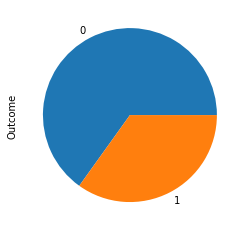

In [19]:
#Check the amount of diabetes vs non-diabetes people
df["Outcome"].value_counts().plot(kind='pie')

In [15]:
#Get an idea about mean features for diabetes vs non-diabetes
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [16]:
#See if there's any null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

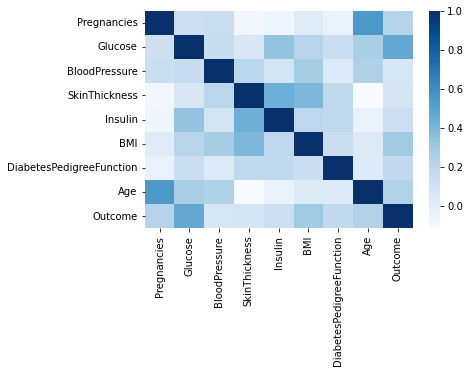

In [17]:
correlation = df.corr()
sns.heatmap(correlation, cmap = 'Blues')

In [ ]:
#Splitting the dataframe
x = df.drop('Outcome', axis=1)
y = df["Outcome"]

In [ ]:
#print x 
print(x)


In [ ]:
#Print y
print(y)

In [ ]:
#Data Standardization
scaler = StandardScaler()

In [ ]:
scaler.fit(x)

In [ ]:
standardized_data = scaler.transform(x)

In [ ]:
print(standardized_data)

In [ ]:
x = standardized_data
y = df["Outcome"]

In [ ]:
print(x)
print(y)

In [ ]:
#Making the model
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, stratify=y, random_state=2)

In [ ]:
#Training the model
classifier = svm.SVC(kernel='linear')

In [ ]:
#Training the Support Vector Machine classifier
classifier.fit(xtrain, ytrain)

In [ ]:
#Model Evaluation
#Accuracy score on the training data
xtrain_prediction = classifier.predict(xtrain)
training_data_accuracy = accuracy_score(xtrain_prediction, ytrain)


In [ ]:
#Check the accuracy score of the training data)
print('Accuracy score of the training data ; ', training_data_accuracy)

In [ ]:
#Accuracy score on the test data
xtest_prediction = classifier.predict(xtest)
test_data_accuracy = accuracy_score(xtest_prediction, ytest)
 

In [ ]:
#Check the accuracy score of the test data
print('Accuracy of the test data: ', test_data_accuracy)

In [ ]:
#Making a predictive system
input = (0, 137, 40, 35, 168, 43.1, 2.288, 33)
input_array = np.asarray(input)
input_reshaped = input_array.reshape(1, -1)

In [ ]:
#Standardize the input data
std_data = scaler.transform(input_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print("The person is not diabetic")
else:
    print("The person is diabetic.")